In [1]:
import os
import zipfile
import tarfile
import shutil
import urllib.request

In [3]:
work_dir = os.path.join(os.path.expanduser("/Users/maryam/my-python"), 'lidar')
if not os.path.exists(work_dir):
    os.mkdir(work_dir)
print("Working directory: {}".format(work_dir))

Working directory: /Users/maryam/my-python/lidar


In [12]:
url = "https://github.com/MaryamMoghadam/Lidar/raw/master/lidar-dem.zip"

In [27]:
# download the file 
zip_name = os.path.basename(url)
zip_path = os.path.join(work_dir, zip_name)   

print('Downloading {} ...'.format(zip_name))
urllib.request.urlretrieve(url, zip_path)   
print('Downloading done.'.format(zip_name))
# Unzipping the file
if '.zip' in zip_name:       
    print("Unzipping {} ...".format(zip_name))
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(work_dir)
    print('Unzipping done.')

Unzipping lidar-dem.zip ...
Unzipping done.


In [14]:
import lidar

In [15]:
data_dir = '/Users/maryam/my-python/lidar/lidar-dem'
print(os.listdir(data_dir))

['dsm.tif', 'sink.tif', 'dem.tif']


In [16]:
out_dir = os.path.join(os.getcwd(), "temp")

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

In [17]:
min_size = 1000         # minimum number of pixels as a depression
min_depth = 0.3         # minimum depth as a depression
interval = 0.3          # slicing interval for the level-set method
bool_shp = False        # output shapefiles for each individual level

In [20]:
# extracting sinks based on user-defined minimum depression size
in_dem = os.path.join(data_dir, 'dem.tif')
out_dem = os.path.join(out_dir, "median.tif")
in_dem = lidar.MedianFilter(in_dem, kernel_size=3, out_file=out_dem)
in_dem2 = os.path.join(data_dir, 'dem.tif')
out_dem2 = os.path.join(out_dir, "gaussian.tif")
in_dem2 = lidar.GaussianFilter(in_dem, sigma = 1, out_file=out_dem2)

Median filtering ...
Run time: 0.0148 seconds
Saving dem ...
Gaussian filtering ...
Run time: 0.0043 seconds
Saving dem ...


In [21]:
sink = lidar.ExtractSinks(in_dem, min_size, out_dir)

Loading data ...
min = 379.70, max = 410.72, no_data = -3.402823e+38, cell_size = 1.0
Depression filling ...
Saving filled dem ...
Region grouping ...
Computing properties ...
Saving sink dem ...
Saving refined dem ...
Converting raster to vector ...
Total run time:			 0.0515 s



/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


In [22]:
dep_id, dep_level = lidar.DelineateDepressions(sink, min_size, min_depth, interval, out_dir, bool_shp)

Reading data ...
rows, cols: (400, 400)
Pixel resolution: 1.0
Read data time: 0.0032 seconds
Data preparation time: 0.0099 seconds
Total number of regions: 1
Processing Region # 1 ...
=========== Run time statistics =========== 
(rows, cols):			 (400, 400)
Pixel resolution:		 1.0 m
Number of regions:		 1
Data preparation time:		 0.0099 s
Identify level time:		 0.1775 s
Write image time:		 0.0072 s
Polygonize time:		 0.0129 s
Total run time:			 0.2083 s


/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionpro

In [23]:
print('Results are saved in: {}'.format(out_dir))
print(os.listdir(out_dir))

Results are saved in: /Users/maryam/my-python/temp
['regions.prj', 'median.tif', 'depressions.prj', 'regions_info.csv', 'depth.tif', 'region.tif', 'regions.shp', 'depression_level.tif', 'depression_id.tif', 'regions.shx', 'sink.tif', 'dem_filled.tif', 'depressions.dbf', 'depressions.shp', 'gaussian.tif', 'dem_diff.tif', 'depressions.shx', 'depressions_info.csv', 'regions.dbf', 'dem.tif']


In [24]:
# comment out the third line (%matplotlib inline) if you run the tutorial in other IDEs other than Jupyter Notebook
import matplotlib.pyplot as plt
import imageio
%matplotlib inline  

In [25]:
#Read images as numpy arrays
smoothed = imageio.imread(os.path.join(out_dir, 'median.tif'))
Gsmoothed = imageio.imread(os.path.join(out_dir, 'gaussian.tif'))
sink = imageio.imread(os.path.join(out_dir, 'sink.tif'))
dep_id = imageio.imread(os.path.join(out_dir, 'depression_id.tif'))
dep_level = imageio.imread(os.path.join(out_dir, 'depression_level.tif'))
raster = imageio.imread(os.path.join(out_dir, 'dem.tif'))

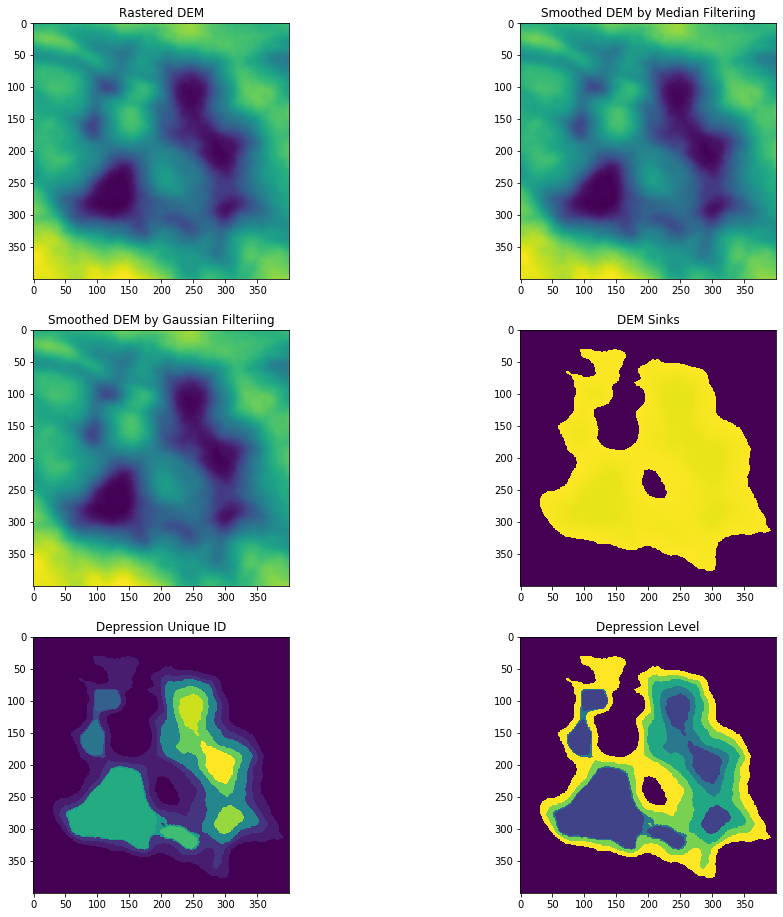

In [26]:
#Plotting multiple images
fig=plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(3, 2, 1)
ax1.set_title('Rastered DEM')
plt.imshow(raster)

ax1 = fig.add_subplot(3, 2, 2)
ax1.set_title('Smoothed DEM by Median Filteriing')
plt.imshow(smoothed)

ax4 = fig.add_subplot(3, 2, 3)
ax4.set_title('Smoothed DEM by Gaussian Filteriing')
plt.imshow(Gsmoothed)

ax2 = fig.add_subplot(3, 2, 4)
ax2.set_title('DEM Sinks')
plt.imshow(sink)

ax3 = fig.add_subplot(3, 2, 5)
ax3.set_title('Depression Unique ID')
plt.imshow(dep_id)

ax4 = fig.add_subplot(3, 2, 6)
ax4.set_title('Depression Level')
plt.imshow(dep_level)

plt.show()